# Classification analysis for Titanic survival data:
The titanic, a famous ship known for its tragedic sinking during its first trip due to hitting an iceberg.
We have data about the passengers in that ship and their survival status "survived or died" and after the analysis we can predict whether a passenger died or not.

the dataset was downloaded from [Kaggle](https://www.kaggle.com/c/titanic/data)


## Structure of dataset:
- **PassengerId**: Id of the passenger.
- **Survived**: Indicator whether the passenger died or not (target variable).
- **Pclass**: Passenger class (1 for first class, 2 for second, 3 for third)
- **Name**: Name of the passenger.
- **Sex**: Sex of the passenger.
- **Age**: Age of the passenger.
- **SibSp**: Number of siblings /spouces of a passenger.
- **Parch**: number of Parents /children onboard.
- **Ticket**: Ticket number.
- **Fare**: Passenger fare.
- **Cabin**: Cabin number.
- **Embarked**: Embarkement port (C = Cherbourg Q = Queenstown S = Southampton).

# Data analysis:

## Loading data:

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# loading dataset
df = pd.read_csv("Dataset/train.csv")

# viewing the first lines
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# checking missing values 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# percentage of missing data
print(100 * df.isna().sum()/len(df))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


## Missing values:
One thing we can see in the dataset information is the amount of missing data.

The `Age` column has 20\% of the values missing, so we can fill them with a probable value (could be the mean, ...etc).

The `Cabin` column has 78\% of the values missing, it's very likely that we do not need it in our analysis, we will just drop it.

In [4]:
# handling missing values
# dropping "Cabin" column
cleaned_df = df.drop("Cabin", axis=1)

# filling missing data from Age
means = cleaned_df.groupby("Survived")["Age"].mean()
print(means)

#cleaned_df.loc[np.logical_and(cleaned_df["Age"].isna(), cleaned_df["Survived"]==0), "Age"] = int(means.iloc[0])
#cleaned_df.loc[np.logical_and(cleaned_df["Age"].isna(), cleaned_df["Survived"]==1), "Age"] = int(means.iloc[1])
cleaned_df.loc[cleaned_df["Age"].isna(), "Age"] = cleaned_df["Age"].mean()

# new column "isMale" to contain integer values of Sex
cleaned_df["isMale"] = cleaned_df["Sex"] == "male"

print(cleaned_df.info())
cleaned_df.head()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
 11  isMale       891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(4)
memory usage: 77.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,isMale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True


## Analysing data:
Let's make some visualisations of some properties.

Survived
0    549
1    342
Name: PassengerId, dtype: int64


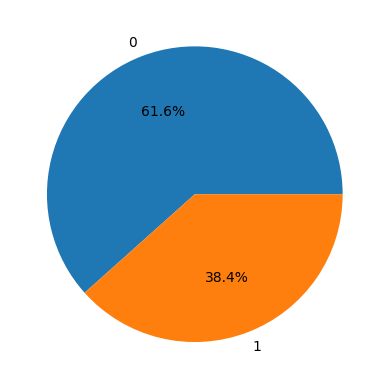

In [5]:
# visualising total  deaths and survivors
total_survivors = cleaned_df.groupby("Survived")["PassengerId"].count()
print(total_survivors)
plt.pie(total_survivors.values, labels=total_survivors.index, autopct='%1.1f%%')
plt.show()

This shows that more than half of the passengers died during the tragedy.

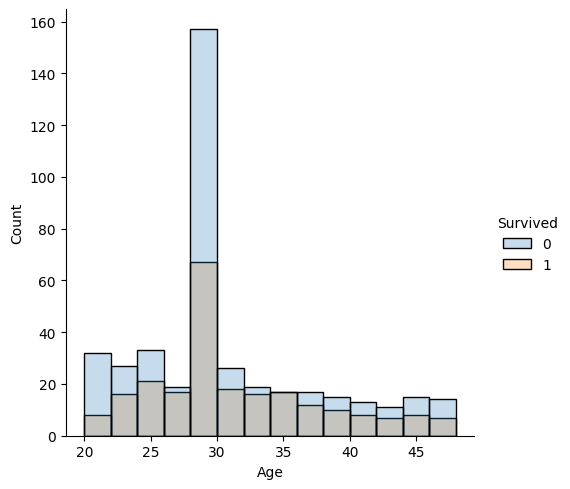

In [6]:
# Visualisations
# Age, Sex and survivals
sns.displot(data=cleaned_df, x="Age", hue="Survived", bins=np.arange(20, 50, 2), alpha=0.25)
plt.show()

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64


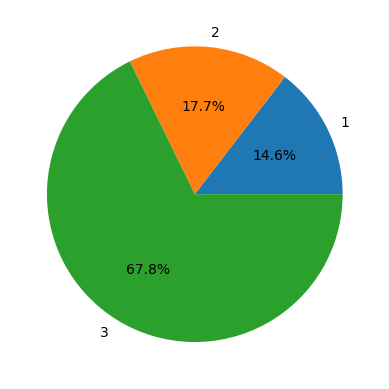

In [7]:
# Displaying the most affected passenger class
class_deaths = cleaned_df[cleaned_df["Survived"]==0].groupby("Pclass")["Survived"].count()
print(class_deaths)
plt.pie(class_deaths.values, labels=class_deaths.index, autopct="%1.1f%%")
plt.show()


The most affected class is the third class

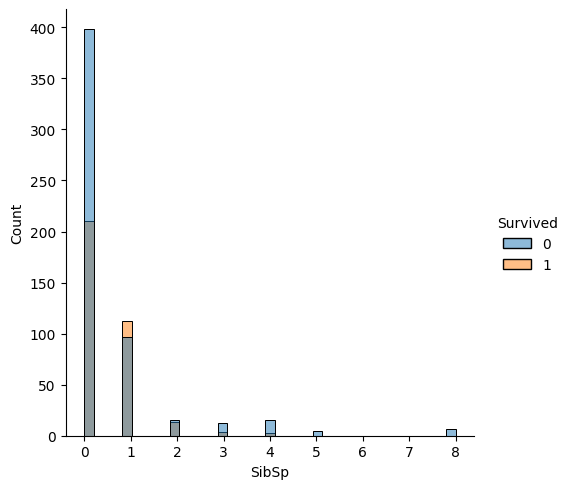

In [8]:
# Deaths and number of siblings/ spouces
sns.displot(data=cleaned_df, x="SibSp", hue="Survived")
plt.show()

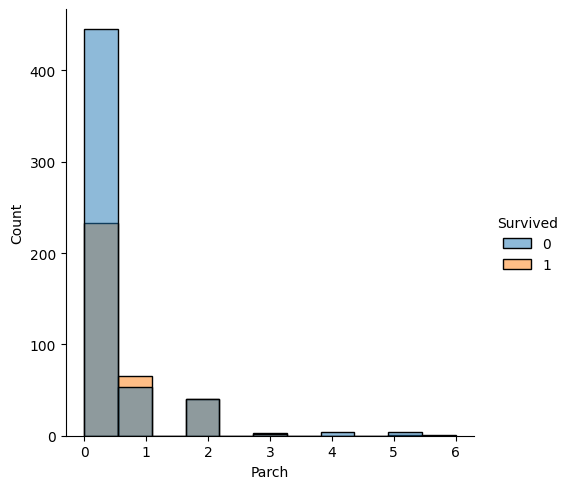

In [9]:
# deaths and number of Parents /children
sns.displot(data=cleaned_df, x="Parch", hue="Survived")
plt.show()

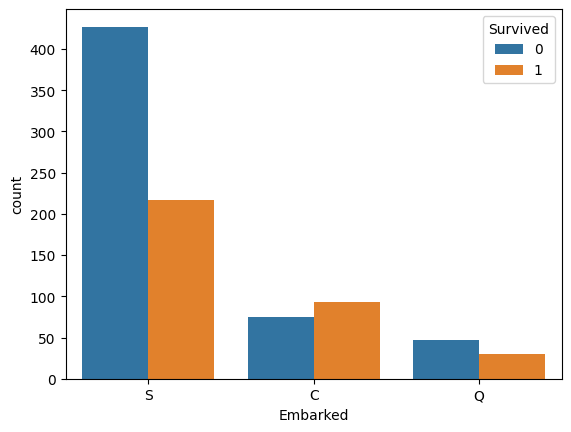

In [10]:
# Survivors based on their embarkment port
sns.countplot(data=cleaned_df, x="Embarked", hue="Survived")
plt.show()

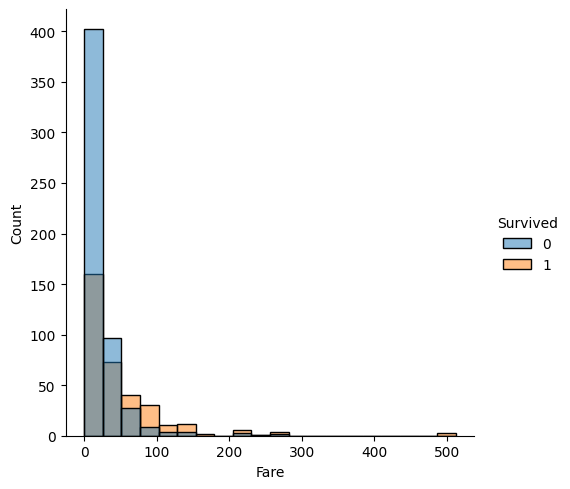

In [11]:
# Fare and deaths
sns.displot(data=cleaned_df, x="Fare", hue="Survived", bins=20)
plt.show()


One of the things that we can see in this plot is that most of the passengers who did not survive have small fare, while those with higher fare values have more survivors than deaths.

# Machine learning and Prediction:
Since we have an overall idea on the trends of survivals, we can proceed into predicting deaths of passengers.


## Feature extraction:
The main columns that we should care about are the following.
- The sex of the passenger (since we can see that there are more men who died than women).
- The class of the passenger.
- Number of siblings /spouces and number of parents /children.
- The age of the passenger.

Some columns should not be included in the training process.
- The name of the passenger.
- The cabin (it has too many missing values).

In [12]:
features = ["isMale", "Pclass", "SibSp", "Parch", "Embarked", "Fare"]
target = ["Survived"]


In our case the target variable contains only two values, which means we can either use logistic regression or classification model (with two classes)

We will use three models: logistic regression, K nearest neighbors and a random forest

In [13]:
# importing models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score as acs
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [14]:
# preparing test data
# loading and preparing test data
# preparing data

X = pd.get_dummies(cleaned_df[features], columns=["Embarked"]).values
y = cleaned_df[target].values
y = np.reshape(y, (-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1000, test_size=.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712, 1), (179, 1))

In [15]:

# Scaler
sc = StandardScaler()

# logistic regression model
logreg = LogisticRegression()
logreg_pipeline = make_pipeline(sc, logreg)

logreg_pipeline.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [16]:
y_pred_test = logreg_pipeline.predict(X_test)
y_pred_train = logreg_pipeline.predict(X_train)

acc_score_logreg = {
    "Train": acs(y_train, y_pred_train),
    "Test": acs(y_test, y_pred_test)
}
acc_score_logreg

{'Train': 0.7921348314606742, 'Test': 0.7877094972067039}

In [17]:
# creating random forest classifier
rfc = RandomForestClassifier()
rfc_pipeline = make_pipeline(sc, rfc)

# fitting model
rfc_pipeline.fit(X_train, y_train)

# predicting and evaluating accuracy
y_pred_rfc_test = rfc_pipeline.predict(X_test)
y_pred_rfc_train = rfc_pipeline.predict(X_train)

acc_score_rfc = {
    "Train": acs(y_train, y_pred_rfc_train),
    "Test": acs(y_test, y_pred_rfc_test)
}
acc_score_rfc

{'Train': 0.9297752808988764, 'Test': 0.8268156424581006}

In [18]:
# creating K nearest neighbors classifier
# Let's try with different number of neighbors to see which one is more accurate
scores_train = []
scores_test = []
avg = []
for nn in range(10, 201):
    print("\r", nn, "...", end="")
    knn = KNeighborsClassifier(n_neighbors=nn)
    knn_pipeline = make_pipeline(sc, knn)
    
    # fitting model
    knn_pipeline.fit(X_train, y_train)
    
    # predicting and evaluating accuracy
    y_pred_knn_train = knn_pipeline.predict(X_train)
    y_pred_knn_test = knn_pipeline.predict(X_test)
    sc_train = acs(y_train, y_pred_knn_train)
    sc_test = acs(y_test, y_pred_knn_test)
    scores_train.append(sc_train)
    scores_test.append(sc_test)
    avg.append((sc_train+sc_test)/2)

 200 ...

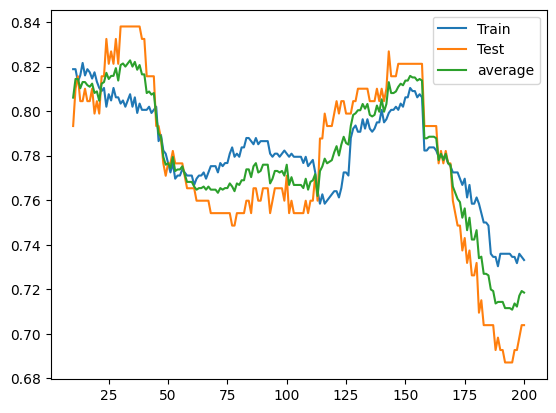

In [19]:
plt.plot(list(range(10, 201)), scores_train, label="Train")
plt.plot(list(range(10, 201)), scores_test, label="Test")
plt.plot(list(range(10, 201)), avg, label="average")
plt.legend()
plt.show()

In [20]:
# training three models based on the maximum value for each list
n_train = 10+np.argmax(scores_train) # the model generating the maximum training score
n_test = 10+np.argmax(scores_test) # the model generating the maximum test score
n_avg = 10+np.argmax(avg) # the model generrating the maximum average score

n_train, n_test, n_avg

(14, 30, 34)

In [21]:
# training each model and checking score
knn_best_train = KNeighborsClassifier(n_neighbors=n_train)
knn_pipeline_best_train = make_pipeline(sc, knn_best_train)
# fitting model
knn_pipeline_best_train.fit(X_train, y_train)

# predicting and evaluating accuracy
y_pred_knn_train = knn_pipeline_best_train.predict(X_train)
y_pred_knn_test = knn_pipeline_best_train.predict(X_test)
{
    "Train": acs(y_train, y_pred_knn_train),
    "Test": acs(y_test, y_pred_knn_test)
}

{'Train': 0.8216292134831461, 'Test': 0.8044692737430168}

In [22]:

knn_best_test = KNeighborsClassifier(n_neighbors=n_test)
knn_pipeline_best_test = make_pipeline(sc, knn_best_test)
# fitting model
knn_pipeline_best_test.fit(X_train, y_train)

# predicting and evaluating accuracy
y_pred_knn_train = knn_pipeline_best_test.predict(X_train)
y_pred_knn_test = knn_pipeline_best_test.predict(X_test)
{
    "Train": acs(y_train, y_pred_knn_train),
    "Test": acs(y_test, y_pred_knn_test)
}

{'Train': 0.8033707865168539, 'Test': 0.8379888268156425}

In [23]:

knn_best_avg = KNeighborsClassifier(n_neighbors=n_avg)
knn_pipeline_best_avg = make_pipeline(sc, knn_best_avg)
# fitting model
knn_pipeline_best_avg.fit(X_train, y_train)

# predicting and evaluating accuracy
y_pred_knn_train = knn_pipeline_best_avg.predict(X_train)
y_pred_knn_test = knn_pipeline_best_avg.predict(X_test)
{
    "Train": acs(y_train, y_pred_knn_train),
    "Test": acs(y_test, y_pred_knn_test)
}

{'Train': 0.8075842696629213, 'Test': 0.8379888268156425}

# Model accuracy insights:
The 'K nearest nieghbors' model has the highest accuracy on test data.

The Random forest model has the highest accuracy on the training data, but a bigger gap between training and test set which increases the probability of overfitting.

The logistic regression is the worst model for this problem due to its very low accuracy score on both sets.

# Final Training:
After all the analysis and training of the model, we re-train it again with all the data to make be used for future predictions.

In [24]:
# retraining the random forest model
rfc_pipeline.fit(X, y)

y_pred_rfc = rfc_pipeline.predict(X)

acs(y, y_pred_rfc)

0.9248035914702581

In [25]:
# retraining the KNN model
knn_pipeline_best_avg.fit(X, y)

y_pred_knn = knn_pipeline_best_avg.predict(X)

acs(y, y_pred_knn)

0.8103254769921436